<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1
---

## Problem Statement

Working as a growth strategist for the owners of the SAT exams, College Board, which state should I recommend the non-profit to open new SAT exam centers to support the increase in demand (if any)?

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Data

### Given Data




* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major
* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges

### Outside Research

According to College Board, in 2019, the SATs have __[55% of the market share.](https://newsroom.collegeboard.org/over-22-million-students-class-2019-took-sat-largest-group-ever#:~:text=Over%202.2%20Million%20Students%20in,Group%20Ever%20%7C%20The%20College%20Board)__
In the class of 2023, 1.9 million high school students took the SAT at least once, up slightly from 1.7 million in the previous year's class, according to College Board data.

### Coding Challenges

In [ ]:
# Code: Manually calculate the mean.
def calculate_mean(list_of_values):
    total = 0
    count = 0
    for value in list_of_values:
        total += value
        count += 1
    return total / count if count != 0 else 0

# Test the function
test_values = [10, 20, 30, 40, 50]
print(calculate_mean(test_values))
    

In [532]:
# Code: Manually calculate the standard deviation.
def calculate_standard_deviation(list_of_values):
    mean = calculate_mean(list_of_values)
    variance = sum((x - mean) ** 2 for x in list_of_values) / len(list_of_values)
    return variance ** 0.5

# Test the function
test_values = [10, 20, 30, 40, 50]
print(calculate_standard_deviation(test_values))

14.142135623730951


In [ ]:
# Code: Data cleaning function.
def percent_to_decimal(percent_in_string):
    # Remove the percent symbol and convert to float
    return float(percent_in_string.strip('%')) / 100.0

# Test the function
print(percent_to_decimal('50%'))    # Output: 0.5
print(percent_to_decimal('30.5%'))  # Output: 0.305
    

--- 
# Part 2
---

In [ ]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

### Data Import & Cleaning

In [ ]:
# Read in csv files: 
sat_2017 = pd.read_csv('../data/sat_2017.csv')
sat_2018 = pd.read_csv('../data/sat_2018.csv')
sat_2019 = pd.read_csv('../data/sat_2019.csv')
sat_2019_major = pd.read_csv('../data/sat_2019_by_intended_college_major.csv')

In [ ]:
#Example of start
# Create a new DataFrame with the common columns for SATs
act_2017_common = act_2017[['State', 'Participation', 'Composite']].copy()
# Avoid SettingWithCopyWarning with .copy()

# Add a 'Year' column to each DataFrame
act_2017_common['Year'] = 2017
act_2018['Year'] = 2018
act_2019['Year'] = 2019

# Concatenate the dataframes
full_act = pd.concat([act_2017_common, act_2018, act_2019], ignore_index=True)

# Remove '%' sign from 'Participation' and convert to numeric in one step
full_act['Participation'] = pd.to_numeric(full_act['Participation'].str.replace('%', ''), errors='coerce')

In [ ]:
sat_2017.head()

In [ ]:
sat_2017.shape

In [ ]:
sat_2017.columns

In [ ]:
#rename columns to lowercases
sat_2017.rename(columns={"State":"state", "Participation":"participation", "Evidence-Based Reading and Writing":"ebrw", "Math":"math", "Total":"total"}, inplace=True)

In [ ]:
#check work
sat_2017.columns

In [ ]:
sat_2017['participation'] = sat_2017['participation'].map(lambda x: percent_to_decimal(x))

In [ ]:
sat_2017['participation'] #checking the floats for participation column

In [ ]:
sat_2017.nunique()

In [ ]:
sat_2017.isnull().sum()

In [ ]:
sat_2017.info() #the participation is now a float

In [ ]:
sat_2017.dtypes #from the datatypes, the participation should be a float, not an object (string)

#Cleaning sat_2018

In [ ]:
sat_2018.head()

In [ ]:
sat_2018.shape

In [ ]:
sat_2018.columns

In [ ]:
#rename columns to lowercases
sat_2018.rename(columns={"State":"state", "Participation":"participation", "Evidence-Based Reading and Writing":"ebrw", "Math":"math", "Total":"total"}, inplace=True)

In [ ]:
sat_2018.columns

In [ ]:
sat_2018['participation'] = sat_2018['participation'].map(lambda x: percent_to_decimal(x))

In [ ]:
sat_2018.info()

In [ ]:
sat_2018.nunique()

In [ ]:
sat_2018.isnull().sum()

In [ ]:
#Cleaning 2019

In [ ]:
sat_2019.head()

In [ ]:
sat_2019.shape #There are too many states in the states column! 53 instead of 51. We have to find them.

In [ ]:
sat_2019.columns

In [ ]:
#rename columns to lowercases
sat_2019.rename(columns={"State":"state", "Participation Rate":"participation", "EBRW":"ebrw", "Math":"math", "Total":"total"}, inplace=True)

In [ ]:
sat_2019.columns

In [ ]:
sat_2019.nunique()

In [ ]:
sat_2019.isnull().sum()

In [ ]:
#make participation% and there was a ValueError: could not convert string to float: '—' error because of the presence of a strange string.
sat_2019['participation'] = sat_2019['participation'].map(lambda x: percent_to_decimal(x))

In [ ]:
sat_2019['participation']  #checking for the string, the string is a "—"

In [ ]:
sat_2019 = sat_2019[sat_2019['participation']!= "—"].reset_index(drop=True) #we need the reindex because the indexes are not 52, we need to change it back to 51.

In [ ]:
sat_2019

In [ ]:
sat_2019.shape

In [ ]:
sat_2019['participation'].unique()

In [ ]:
sat_2017.describe().round(2) #Notice that the min score 52 for Math is too low as the range is 200-800. thus I decided to check that row for the correct range.

In [ ]:
sat_2018.describe().round(2)

In [ ]:
sat_2019.describe().round(2)

In [ ]:
sat_2019['participation'].dtypes

In [ ]:
sat_2017['math'].value_counts() #notice that only 1 row had too low data thus we must check the entire row for math=52, it could be a typo!

In [ ]:
sat_2017.head(23) #checking that the value appeared in row 20, Maryland, we can infer that it was a typo as we have the total column. ebrw+math=total
#thus, I replaced the Maryland math score 52 to 524 since 1060-536 =524.

In [ ]:
sat_2017.loc[20, 'math'] = 524

In [ ]:
sat_2017.head(23)

In [ ]:
sat_2017.describe().round(2) #the more plausible math min. score is now 468.00.

In [ ]:
#to check if all the scores are added up properly, I do this to sat_2017, sat_2018, and sat_2019 scores. ebrw+math =total.

In [ ]:
#checking_scores ---> sat_2017['ebrw']+ sat_2017['math'] == sat_2017[total])

# New column for the sum of 'ebrw' and 'math'
sat_2017['calculated_total'] = sat_2017['ebrw'] + sat_2017['math']

# Check if the calculated total matches the 'total' column
sat_2017['is_correct'] = sat_2017['calculated_total'] == sat_2017['total']

# Display rows where the total is incorrect
incorrect_totals = sat_2017[sat_2017['is_correct'] == False]

print("\nRows with incorrect totals:\n", incorrect_totals)
#Thus, there are 15 incorrect totals for the following rows: I will replace them with the correct total.

In [ ]:
#In sat_2017 there are only 15 rows to clean, and the total values are only off by 1 point. Thus, it was probably due to rounding a number up or down.

In [ ]:
#checking_scores ---> sat_2018['ebrw']+ sat_2018['math'] == sat_2018[total])

# New column for the sum of 'ebrw' and 'math'
sat_2018['calculated_total'] = sat_2018['ebrw'] + sat_2018['math']

# Check if the calculated total matches the 'total' column
sat_2018['is_correct'] = sat_2018['calculated_total'] == sat_2018['total']

# Display rows where the total is incorrect
incorrect_totals = sat_2018[sat_2018['is_correct'] == False]

print("\nRows with incorrect totals:\n", incorrect_totals)

In [ ]:
#checking_scores ---> sat_2019['ebrw']+ sat_2019['math'] == sat_2019[total])

# New column for the sum of 'ebrw' and 'math'
sat_2019['calculated_total'] = sat_2019['ebrw'] + sat_2019['math']

# Check if the calculated total matches the 'total' column
sat_2019['is_correct'] = sat_2019['calculated_total'] == sat_2019['total']

# Display rows where the total is incorrect
incorrect_totals = sat_2019[sat_2019['is_correct'] == False]

print("\nRows with incorrect totals:\n", incorrect_totals)

In [ ]:
# So, my choice is not to change the SAT maths or SAT ebrw scores as I assume these were marked correctly, 
# but I will adjust the total to become the calculated_total instead.
sat_2017['total'] = sat_2017['calculated_total'].copy()
sat_2018['total'] = sat_2018['calculated_total'].copy()
sat_2019['total'] = sat_2019['calculated_total'].copy()

In [ ]:
#Next, check the unique values for the states in case they are not spelled correctly.

In [ ]:
#rechecking_scores ---> sat_2019['ebrw']+ sat_2019['math'] == sat_2019[total])

# New column for the sum of 'ebrw' and 'math'
sat_2019['calculated_total'] = sat_2019['ebrw'] + sat_2019['math']

# Check if the calculated total matches the 'total' column
sat_2019['is_correct'] = sat_2019['calculated_total'] == sat_2019['total']

# Display rows where the total is incorrect
incorrect_totals = sat_2019[sat_2019['is_correct'] == False]

print("\nRows with incorrect totals:\n", incorrect_totals)

In [ ]:
sat_2017['state'].unique()

In [ ]:
sat_2018['state'].unique()

In [ ]:
sat_2019['state'].unique()

In [ ]:
#Thus, in 2017, 2018, 2019 the 50 states plus district of Columbia are spelled correctly

In [ ]:
#top 10 states 2017 according to total
sat_2017.sort_values('total', ascending=False).head(10)

In [ ]:
sat_2018.sort_values('total', ascending=False).head(10)

In [ ]:
sat_2019.sort_values('total', ascending=False).head(10)

In [ ]:
# I observed that the participation rate is low, probably leading to the highest total score. Thus, I sort by participation rate.
sat_2017.sort_values('participation', ascending=False).head(10)

In [ ]:
sat_2018.sort_values('participation', ascending=False).head(10)

In [ ]:
sat_2019.sort_values('participation', ascending=False).head(10)

In [ ]:
#thus the participation rate seems to be very low for the top 10 best total scores. So, I used both conditions to judge the best states?
sat_2017.sort_values(['participation', 'total'], ascending=[False, False]).head(10)

In [ ]:
sat_2018.sort_values(['participation', 'total'], ascending=[False, False]).head(10)

In [ ]:
sat_2019.sort_values(['participation', 'total'], ascending=[False, False]).head(10)

In [ ]:
#filter states with greater than 80% participation
sat_2017[sat_2017['participation'] >0.8]

### Data Dictionary



|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*string*|sat_2017|The name of the states in the US, there are 50 states in total. + 1 extra state: District of Colombia| 
|**participation**|*float*|sat_2017|The percentage of the participation rate of each state.|
|**ebrw**|*int*|sat_2017|The English section score (score range = 200-800).| 
|**math**|*int*|sat_2017|The Math section score (score range = 200-800).| 
|**total**|*int*|sat_2017|The total final weighted score by adding the verbal 'ebrw' and 'math' scores.| 

## Exploratory Data Analysis

In [ ]:
#Code: Create a standard deviation function. 
def create_std(items):
    sdev = np.mean(items)
    return np.sqrt(sum([(value -sdev)**2 for value in values])/len(values))

sd= sat_2017.apply(lambda x: create_std(x))

In [ ]:
# plt.figure(figsize=(12,6))
# sns.heatmap(sat_2017.corr(numeric_only=True), annot=True);

In [ ]:
#I want to plot participation rate with score
sat_2017.plot(x='total', y = 'participation', kind='scatter', title='2017 SAT Total Score and Participation Rates');

In [ ]:
sat_2018.plot(x='total', y = 'participation', kind='scatter', title='2018 SAT Total Score and Participation Rates');

In [ ]:
sat_2019.plot(x='total', y = 'participation', kind='scatter', title='2019 SAT Total Score and Participation Rates');

In [ ]:
plt.hist(sat_2017['participation']);
plt.title('Distribution of participation rate');
plt.ylabel('Participation rate');
plt.xlabel('Frequency');

In [ ]:
plt.hist(sat_2018['participation']);
plt.title('Distribution of participation rate');
plt.ylabel('Participation rate');
plt.xlabel('Frequency');

In [ ]:
plt.hist(sat_2019['participation']);
plt.title('Distribution of participation rate');
plt.ylabel('Participation rate');
plt.xlabel('Frequency');

In [ ]:
plt.hist(sat_2017['ebrw']);
plt.title('Distribution of English scores');
plt.ylabel('English scores');
plt.xlabel('Frequency');

In [ ]:
plt.hist(sat_2017['math']);
plt.title('Distribution of Math scores');
plt.ylabel('Math scores');
plt.xlabel('Frequency');

In [ ]:
# using just matplotlib and the dictionary of numbers
fig, axs = plt.subplots(1,3, figsize=(18,6))

axs[0].plot(sat_2017['math'], sat_2017['participation'], 'b.');
axs[0].set_title('Participation Rate vs Math');
axs[0].set_ylabel('Participation Rate');
axs[0].set_xlabel('Math');

axs[1].plot(sat_2017['ebrw'], sat_2017['participation'], 'r*');
axs[1].set_title('Participation Rate vs English');
axs[1].set_ylabel('Participation Rate');
axs[1].set_xlabel('English');

axs[2].plot(sat_2017['math'], sat_2017['ebrw'], 'gv');
axs[2].set_title('English vs Math');
axs[2].set_ylabel('English');
axs[2].set_xlabel('Math');

In [ ]:
sat_2017['math'].hist(bins=30)
plt.show()

In [ ]:
sat_2019_major.head()

In [ ]:
sat_2019_major.info()

In [ ]:
sat_2019_major.columns

In [ ]:
#rename columns
sat_2019_major.rename(columns={'IntendedCollegeMajor':'major', 'TestTakers':'test_takers', 'Percent':'percent', 'Total': 'total', 'ReadingWriting':'ebrw', 'Math':'math'}, inplace=True)

In [ ]:
sat_2019_major.columns

In [ ]:
sat_2019_major.shape

In [ ]:
sat_2019_major.nunique()

In [ ]:
sat_2019_major.isnull().sum()

In [ ]:
#change the string objects : 'test_takers' column to int and 'percent' column to float
sat_2019_major['test_takers'].unique() #there are commas on the numbers, thus, we need to convert them to int and remove the commas. 


In [ ]:
sat_2019_major['test_takers'] = sat_2019_major['test_takers'].str.replace(',', '').astype(int)

In [ ]:
sat_2019_major['test_takers'].unique()

In [ ]:
sat_2019_major['percent'] = sat_2019_major['percent'].map(lambda x: percent_to_decimal(x))

In [ ]:
sat_2019_major['percent'].unique() # i did not understand percent, thus I discovered that it is just the ratio of test-takers for each major, thus i will rename the column

In [ ]:
#rename column 'percent' to 'percent_takers' i.e. test takers taking each major
sat_2019_major.rename(columns={'IntendedCollegeMajor':'major', 'TestTakers':'test_takers', 'percent':'percent_takers', 'Total': 'total', 'ReadingWriting':'ebrw', 'Math':'math'}, inplace=True)

In [ ]:
sat_2019_major.columns

In [ ]:
sat_2019_major['percent_takers']

In [ ]:
sat_2019_major.sort_values('percent_takers', ascending=False).head(10)

In [ ]:
#I would like to merge 2017, 2018, 2019 on State, thus for each file, I added a 'year' column specifying the year.
sat_2017['year'] = 2017

In [ ]:
sat_2017.columns

In [ ]:
sat_2017.head()

In [ ]:
sat_2018['year'] = 2018

In [ ]:
sat_2019['year'] = 2019

In [ ]:
sat_2018.columns

In [ ]:
sat_2018.head()

In [ ]:
sat_2019.head()

In [ ]:
sat_2017 = sat_2017.drop(columns=['calculated_total', 'is_correct'])

In [ ]:
sat_2017.head()

In [ ]:
sat_2018 = sat_2018.drop(columns=['calculated_total', 'is_correct'])

In [ ]:
sat_2019 = sat_2019.drop(columns=['calculated_total', 'is_correct'])

In [ ]:
sat_2018.head()

In [ ]:
sat_2019.head()

In [ ]:
#Then I will concatenate the 2017, 2018, 2019 data into 1 dataframe 'sats'. 
sats= pd.concat([sat_2017, sat_2018, sat_2019], ignore_index=True)
 

In [ ]:
sats.shape

In [ ]:
sats.info()

In [ ]:
sats.columns

In [434]:
sats.head()

,state,participation,ebrw,math,total,year
0,Alabama,0.05,593,572,1165,2017
1,Alaska,0.38,547,533,1080,2017
2,Arizona,0.30,563,553,1116,2017
3,Arkansas,0.03,614,594,1208,2017
4,California,0.53,531,524,1055,2017


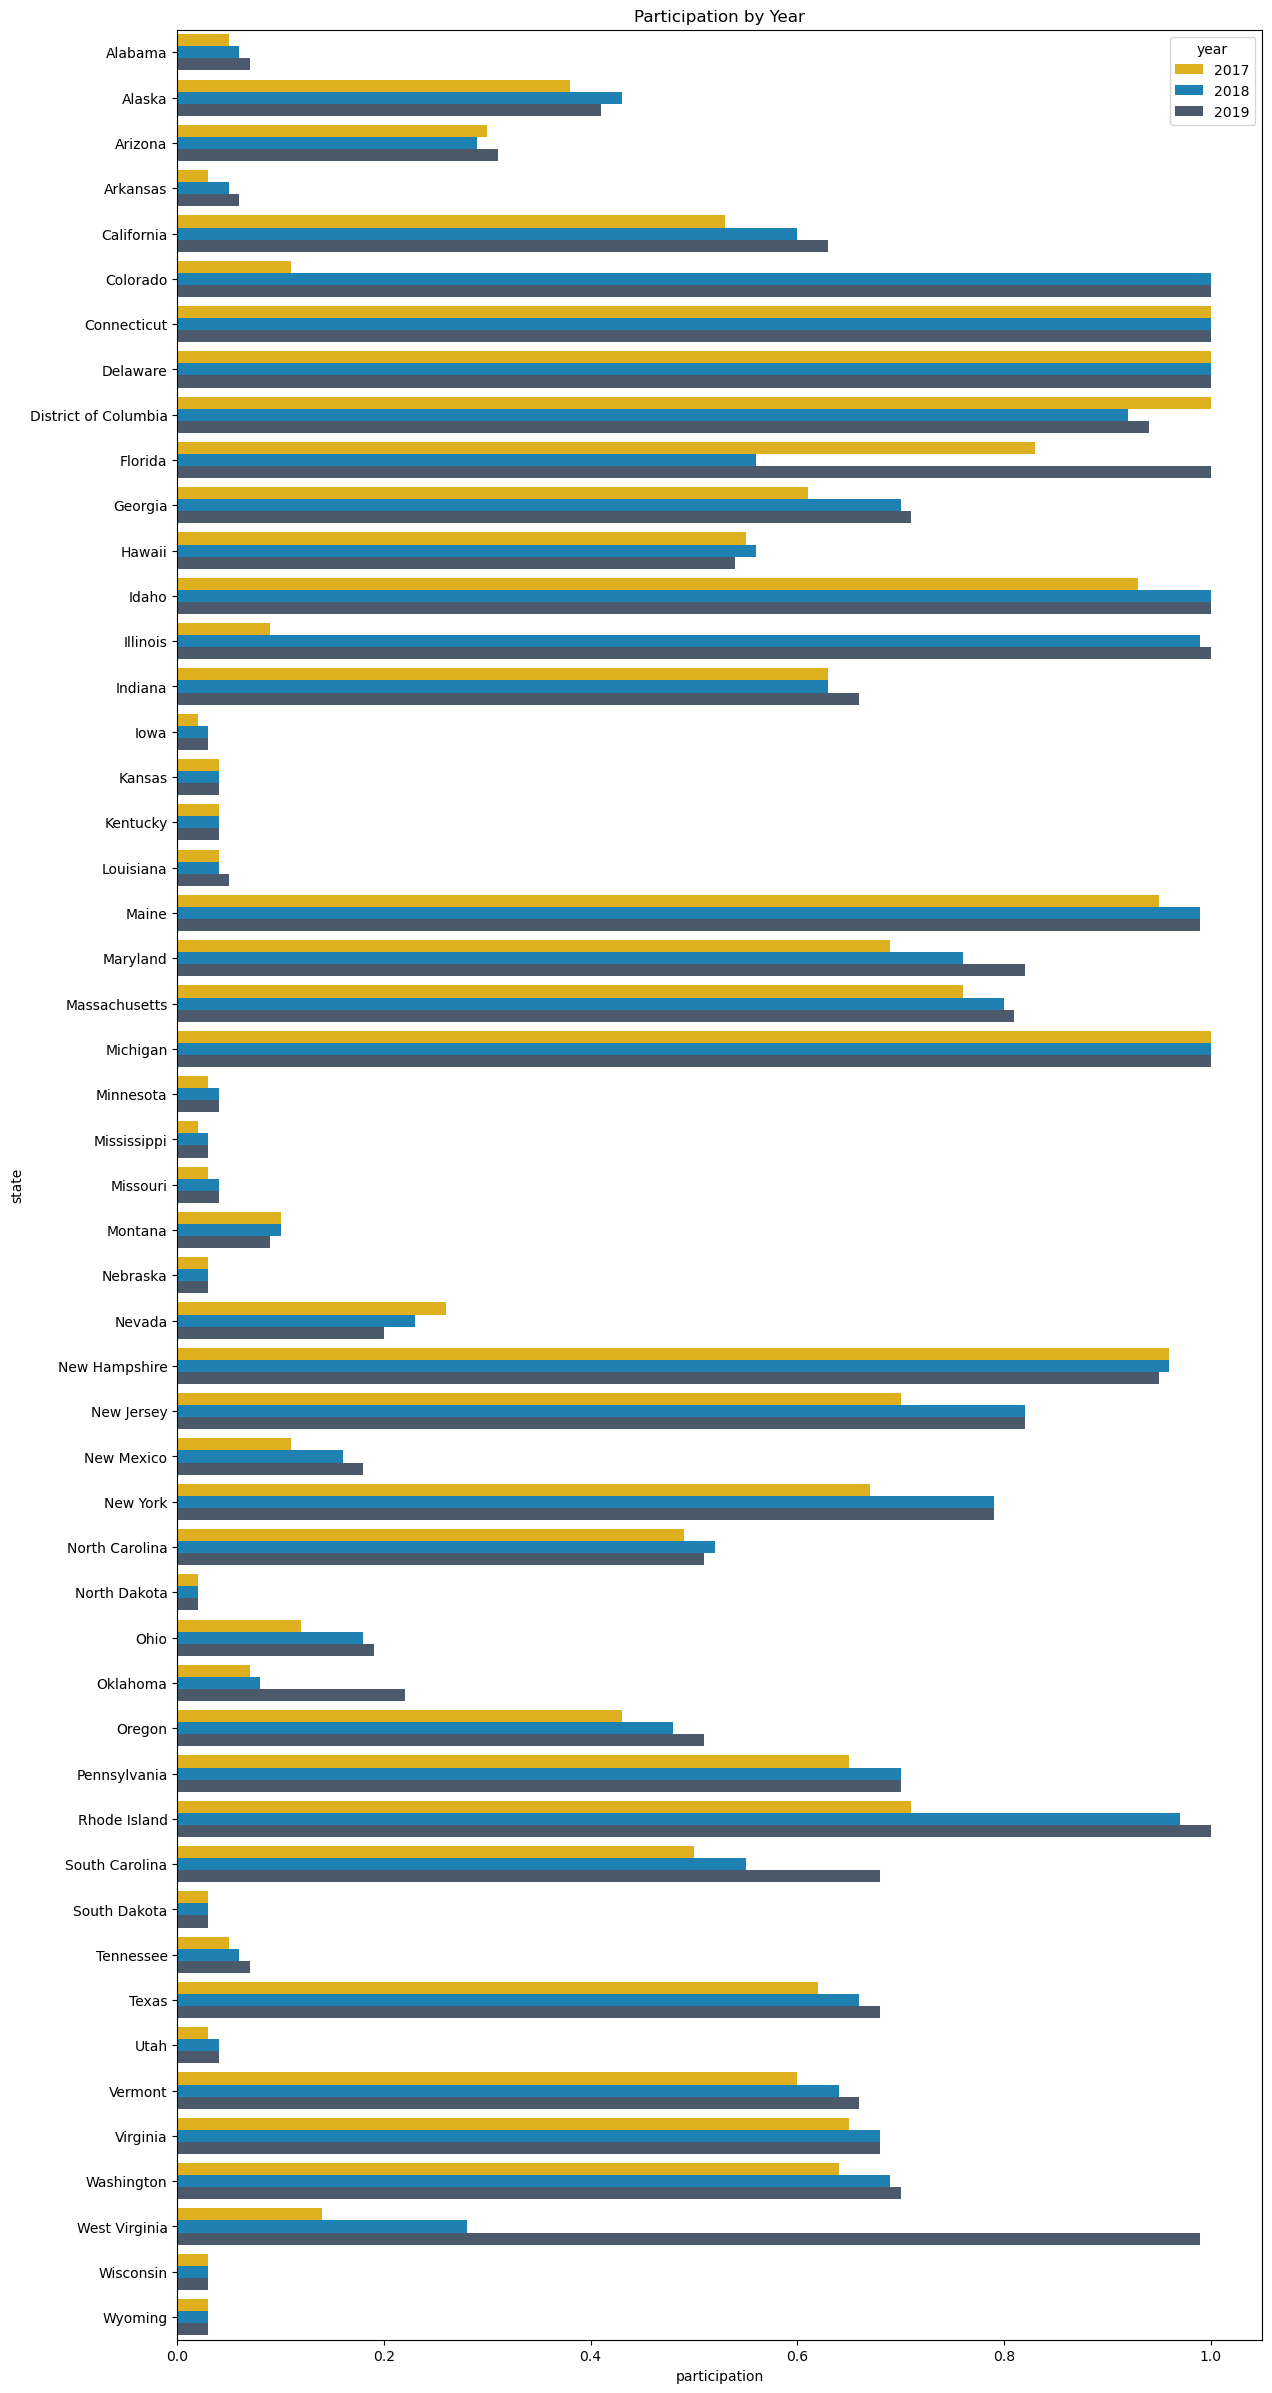

In [458]:
plt.figure(figsize=(14, 30))
palette = ['#FEC000', '#0788CA', '#46596F'] #medium blue, dark blue, teal blue #0CC9E5
sns.barplot(x='participation', y='state', data=sats, hue='year', palette=palette)
plt.title("Participation by Year")
plt.savefig('state_participation_count_by_year.png', format='png')
plt.show();

In [460]:
sats.sort_values('participation', ascending=False).head(10)

,state,participation,ebrw,math,total,year
109,Delaware,1.0,499,486,985,2019
111,Florida,1.0,516,483,999,2019
115,Illinois,1.0,509,504,1013,2019
114,Idaho,1.0,505,488,993,2019
56,Colorado,1.0,519,506,1025,2018
22,Michigan,1.0,509,495,1004,2017
57,Connecticut,1.0,535,519,1054,2018
58,Delaware,1.0,505,492,997,2018
63,Idaho,1.0,508,493,1001,2018
73,Michigan,1.0,511,499,1010,2018


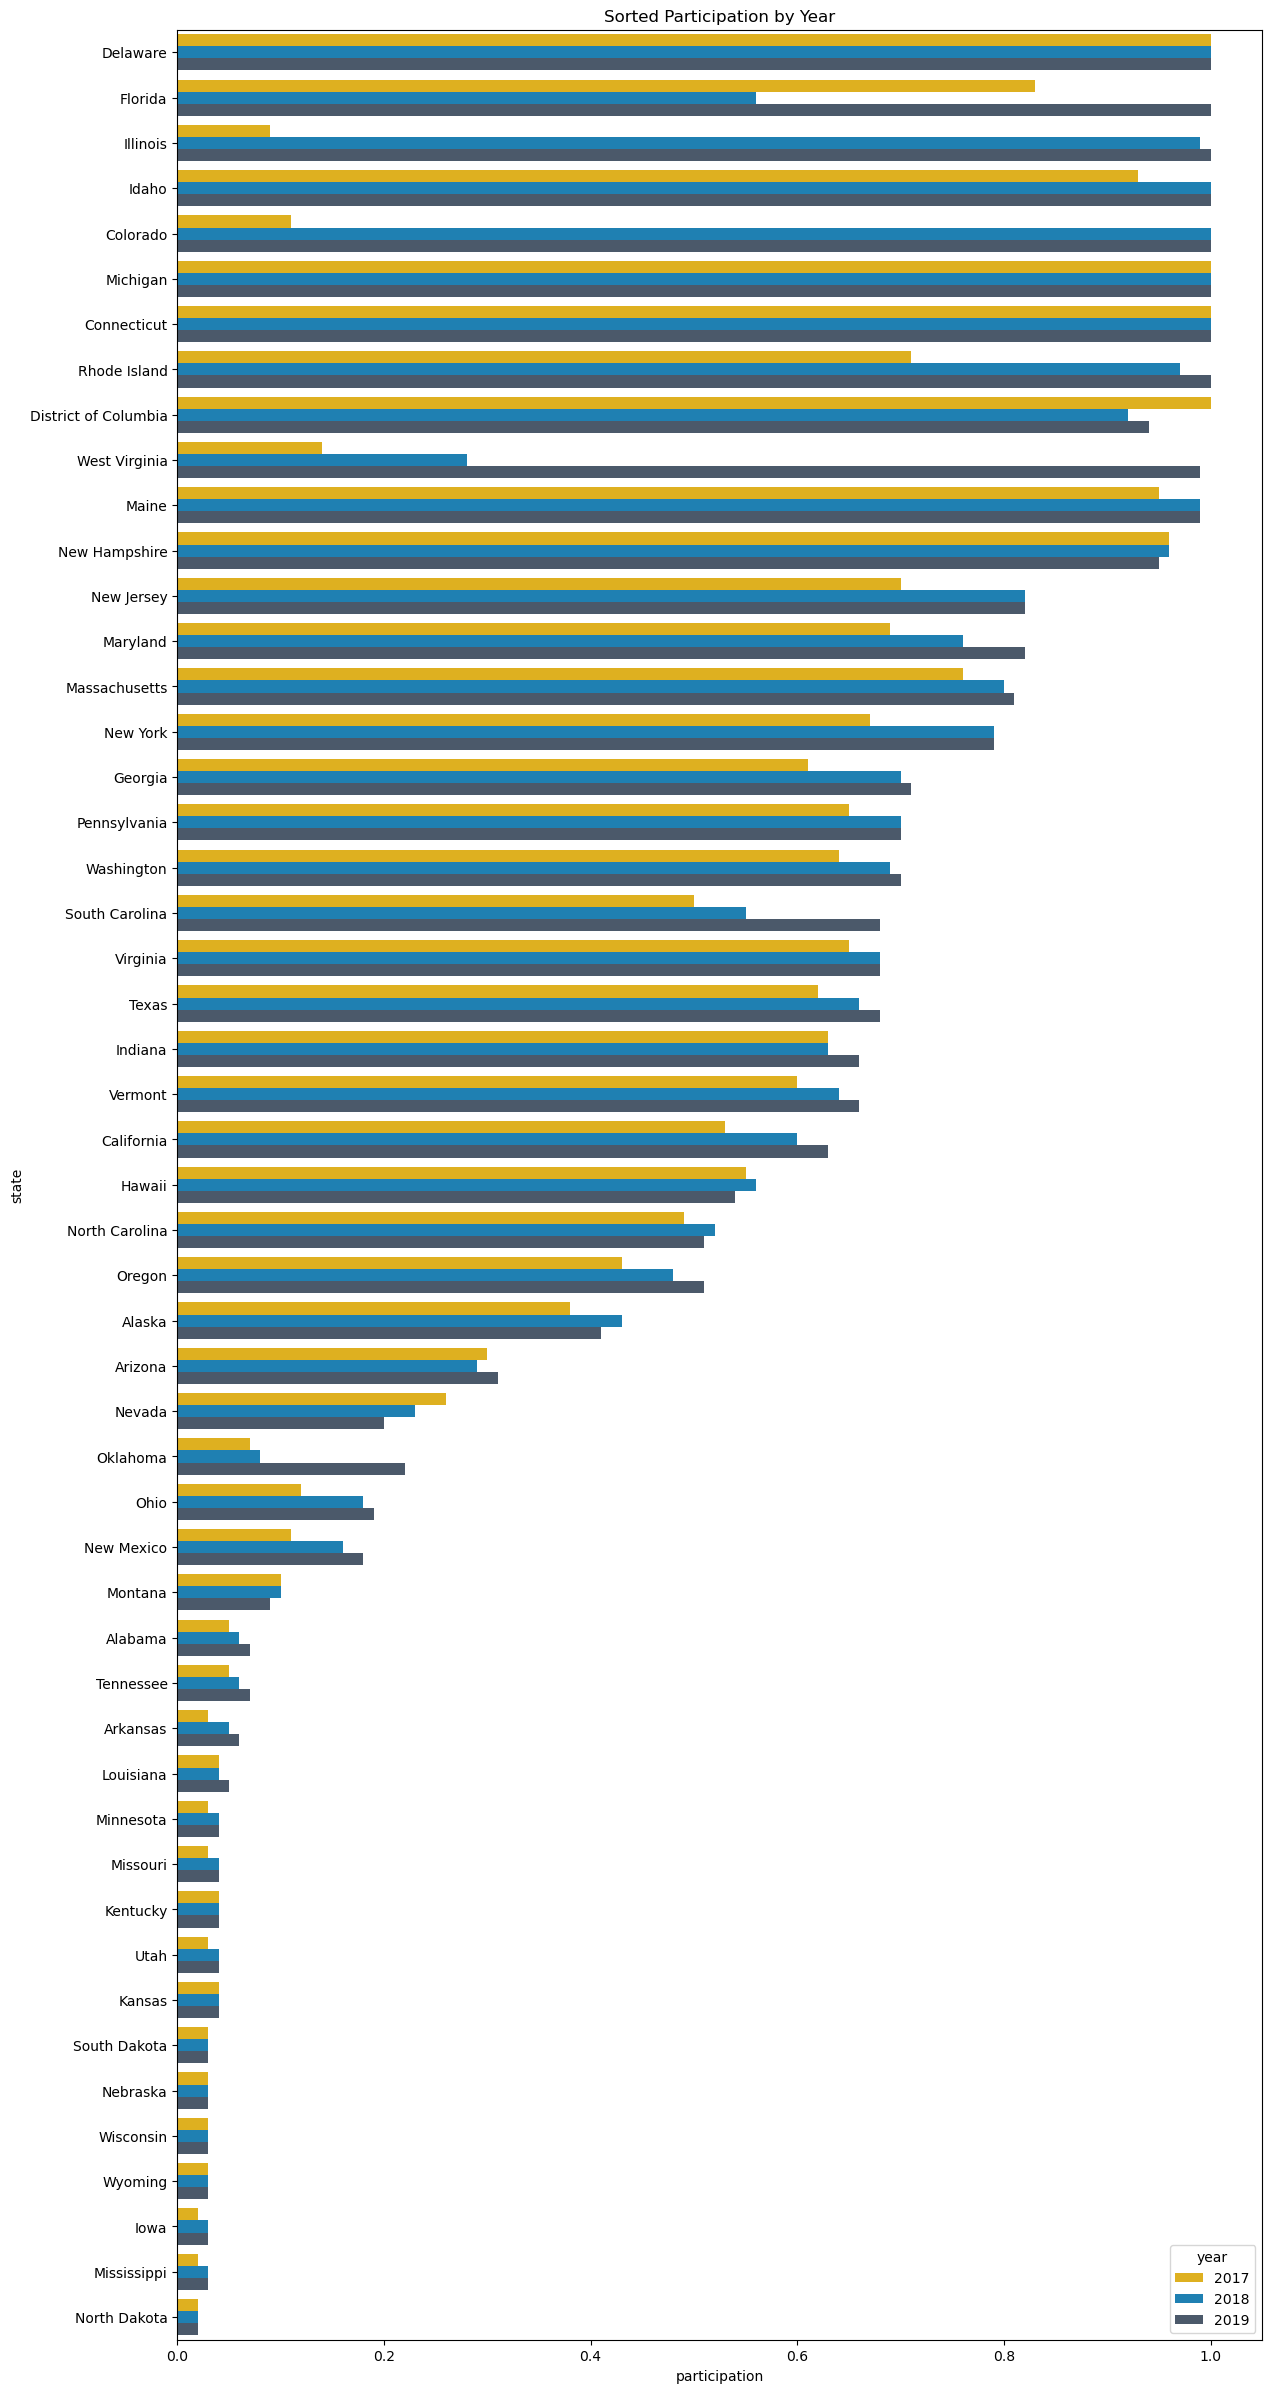

In [474]:
plt.figure(figsize=(14, 30))
palette = ['#FEC000', '#0788CA', '#46596F'] #medium blue, dark blue, teal blue #0CC9E5
sns.barplot(x='participation', y='state', data=sats.sort_values('participation', ascending=False), hue='year', palette=palette)
plt.title("Sorted Participation by Year")
plt.savefig('sorted_state_participation_count_by_year.png', format='png')
plt.show();

In [482]:
#filter states with greater than 80% participation
sats[(sats['participation'] > 0.8) & (sats['year']== 2019)].sort_values('participation', ascending=False)

,state,participation,ebrw,math,total,year
107,Colorado,1.00,518,506,1024,2019
108,Connecticut,1.00,529,516,1045,2019
109,Delaware,1.00,499,486,985,2019
111,Florida,1.00,516,483,999,2019
114,Idaho,1.00,505,488,993,2019
115,Illinois,1.00,509,504,1013,2019
124,Michigan,1.00,507,496,1003,2019
141,Rhode Island,1.00,503,492,995,2019
121,Maine,0.99,512,502,1014,2019
150,West Virginia,0.99,483,460,943,2019


In [484]:
sats[(sats['participation'] > 0.8) & (sats['year']== 2018)].sort_values('participation', ascending=False)

,state,participation,ebrw,math,total,year
56,Colorado,1.00,519,506,1025,2018
57,Connecticut,1.00,535,519,1054,2018
58,Delaware,1.00,505,492,997,2018
63,Idaho,1.00,508,493,1001,2018
73,Michigan,1.00,511,499,1010,2018
64,Illinois,0.99,513,506,1019,2018
70,Maine,0.99,512,501,1013,2018
90,Rhode Island,0.97,513,505,1018,2018
80,New Hampshire,0.96,535,528,1063,2018
59,District of Columbia,0.92,497,480,977,2018


In [486]:
sats[(sats['participation'] > 0.8) & (sats['year']== 2017)].sort_values('participation', ascending=False)

,state,participation,ebrw,math,total,year
6,Connecticut,1.00,530,512,1042,2017
7,Delaware,1.00,503,492,995,2017
8,District of Columbia,1.00,482,468,950,2017
22,Michigan,1.00,509,495,1004,2017
29,New Hampshire,0.96,532,520,1052,2017
19,Maine,0.95,513,499,1012,2017
12,Idaho,0.93,513,493,1006,2017
9,Florida,0.83,520,497,1017,2017


In [508]:
sats_pivot = sats[sats['participation'] > 0.8].pivot(index='state', columns='year', values='participation')
sats_pivot.sort_values(by = [2017, 2018, 2019], ascending=False).fillna('--')
# Reset the index so that 'person_name' becomes a column again
#sats = sats.reset_index(

year,2017,2018,2019
state,,,
Connecticut,1.0,1.0,1.00
Delaware,1.0,1.0,1.00
Michigan,1.0,1.0,1.00
District of Columbia,1.0,0.92,0.94
New Hampshire,0.96,0.96,0.95
Maine,0.95,0.99,0.99
Idaho,0.93,1.0,1.00
Florida,0.83,--,1.00
Colorado,--,1.0,1.00


In [494]:
sats_pivot

year,2017,2018,2019
state,,,
Colorado,NaN,1.00,1.00
Connecticut,1.00,1.00,1.00
Delaware,1.00,1.00,1.00
District of Columbia,1.00,0.92,0.94
Florida,0.83,NaN,1.00
Idaho,0.93,1.00,1.00
Illinois,NaN,0.99,1.00
Maine,0.95,0.99,0.99
Maryland,NaN,NaN,0.82


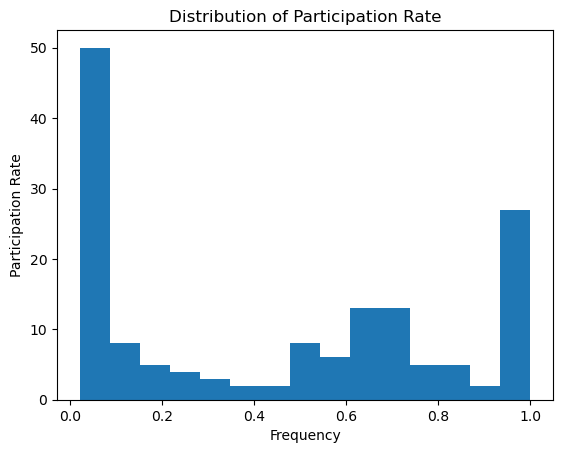

In [520]:
plt.hist(sats['participation'], bins=15);
plt.title('Distribution of Participation Rate');
plt.ylabel('Participation Rate');
plt.xlabel('Frequency');
plt.savefig('histo_participation.png', format='png')

In [671]:
# Extract unique years dynamically
sats_years = sorted(sats['year'].unique())

# Pivot the data using the dynamic list of years
sats_pivot = sats.pivot(index='state', columns='year', values='participation')

# Replace NaN values with 0 or any other value (if necessary)
sats_pivot = sats_pivot.fillna(0)

# Calculate year-over-year percentage change
sats_pct_change = sats_pivot.pct_change(axis=1) * 100

# Reset the index so that 'person_name' becomes a column again
sats_pct_change = sats_pct_change.reset_index()

# Rename columns?
sats_pct_change
sats_pct_change.to_csv('sats_pct_change.csv', index=False)

## Visualize the Data

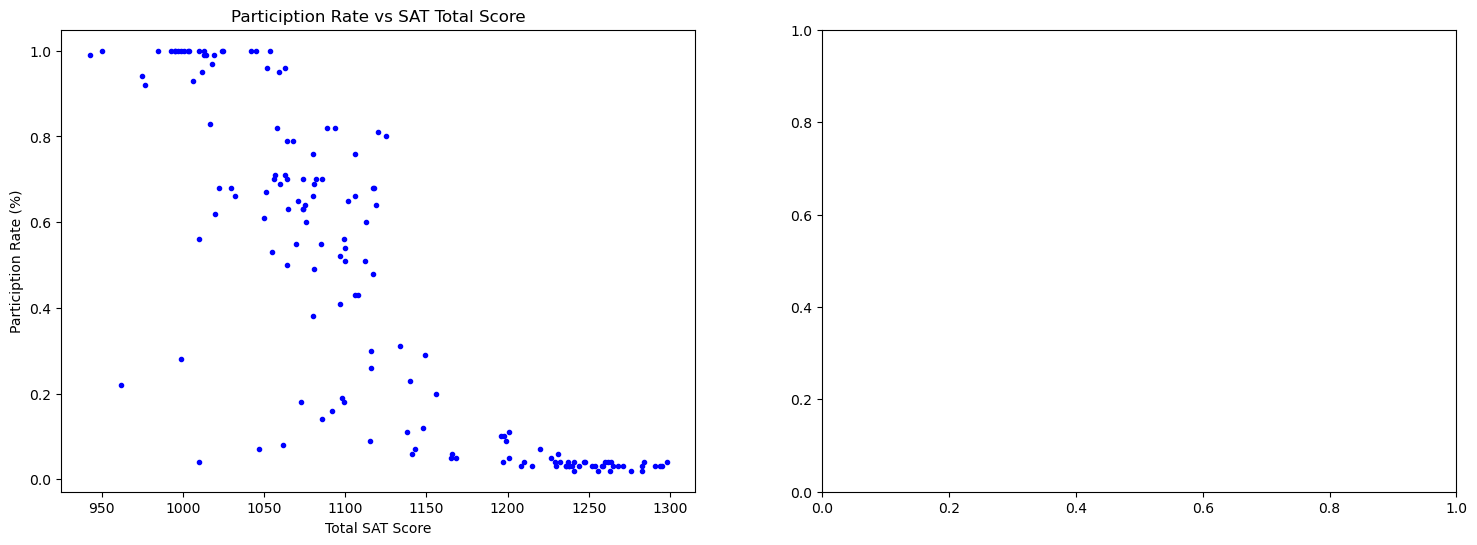

In [561]:
# Code e.g. 
# plotting scatter plot for the participation rate vs. total SAT score

fig, axs = plt.subplots(1,2, figsize=(18,6))

axs[0].plot(sats['total'], sats['participation'], 'b.');
axs[0].set_title('Particiption Rate vs SAT Total Score');
axs[0].set_ylabel('Particiption Rate (%)');
axs[0].set_xlabel('Total SAT Score');


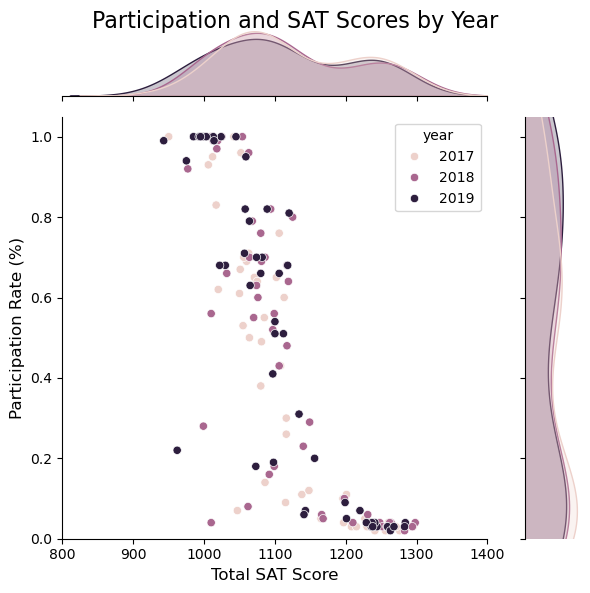

In [606]:
#create jointplot
jointplot_sat = sns.jointplot(x='total', y='participation', data=sats, hue='year')

# Add titles and axis labels
jointplot_sat.fig.suptitle('Participation and SAT Scores by Year', fontsize=16)
jointplot_sat.set_axis_labels('Total SAT Score', 'Participation Rate (%)', fontsize=12)

jointplot_sat.ax_joint.set_xlim(800, 1400)  # Set x-axis limits
jointplot_sat.ax_joint.set_ylim(0.0, 1.05)  # Set y-axis limits

# Adjust the title position to avoid overlapping
jointplot_sat.fig.tight_layout()
jointplot_sat.fig.subplots_adjust(top=0.95)
jointplot_sat.fig.savefig('jointplot_parti_and_year.png', format='png')
plt.show();


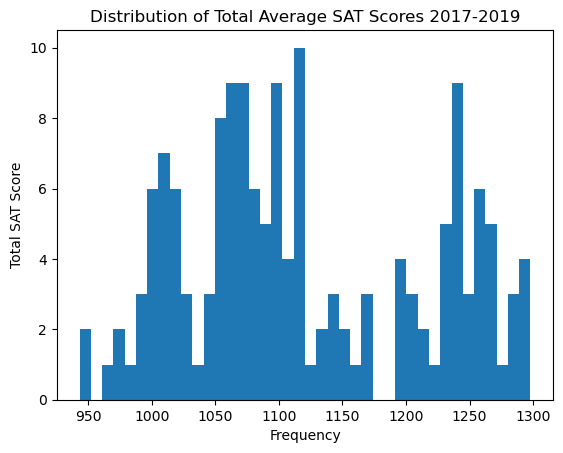

In [620]:
plt.hist(sats['total'], bins=40);
plt.title('Distribution of Total Average SAT Scores 2017-2019');
plt.ylabel('Total SAT Score');
plt.xlabel('Frequency');
plt.savefig('histo_total.png', format='png')

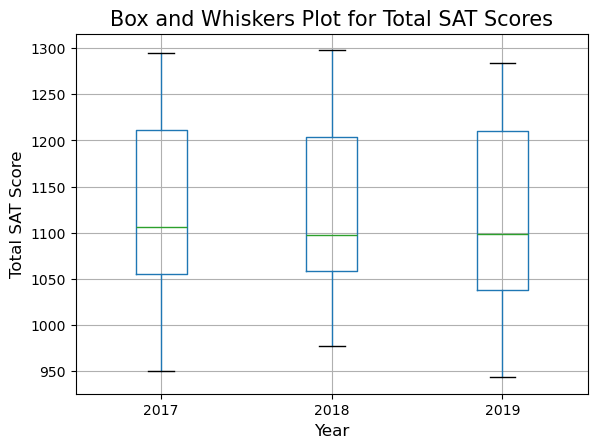

In [628]:
#create the box plot
sats.boxplot(by='year', column=['total'])

# Add title and labels
plt.title('Box and Whiskers Plot for Total SAT Scores', fontsize=15)
plt.suptitle('')  # Remove automatic suptitle
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total SAT Score', fontsize=12)
plt.savefig('box_whiskers_total_sat.png', format='png')
plt.show()

In [630]:
sats.describe()

,participation,ebrw,math,total,year
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.448693,564.535948,555.104575,1119.640523,2018.000000
std,0.370944,46.301362,48.485370,94.171150,0.819178
min,0.020000,480.000000,460.000000,943.000000,2017.000000
25%,0.040000,531.000000,521.000000,1054.000000,2017.000000
50%,0.500000,554.000000,546.000000,1099.000000,2018.000000
75%,0.760000,614.000000,596.000000,1210.000000,2019.000000
max,1.000000,644.000000,655.000000,1298.000000,2019.000000


In [651]:
sats_pct_change

plot(kind='line', x='state', y='participation', color='blue')


# # Add title and labels
plt.title('Simple Scatter Plot', fontsize=15)
plt.xlabel('X Axis', fontsize=12)
plt.ylabel('Y Axis', fontsize=12)

# # Show the plot
plt.show()

year,state,2017,2018,2019
0,Alabama,NaN,20.000000,16.666667
1,Alaska,NaN,13.157895,-4.651163
2,Arizona,NaN,-3.333333,6.896552
3,Arkansas,NaN,66.666667,20.000000
4,California,NaN,13.207547,5.000000
5,Colorado,NaN,809.090909,0.000000
6,Connecticut,NaN,0.000000,0.000000
7,Delaware,NaN,0.000000,0.000000
8,District of Columbia,NaN,-8.000000,2.173913
9,Florida,NaN,-32.530120,78.571429


In [673]:
df = pd.read_csv("sats_pct_change.csv")

In [ ]:
df[].fillna(0.0)

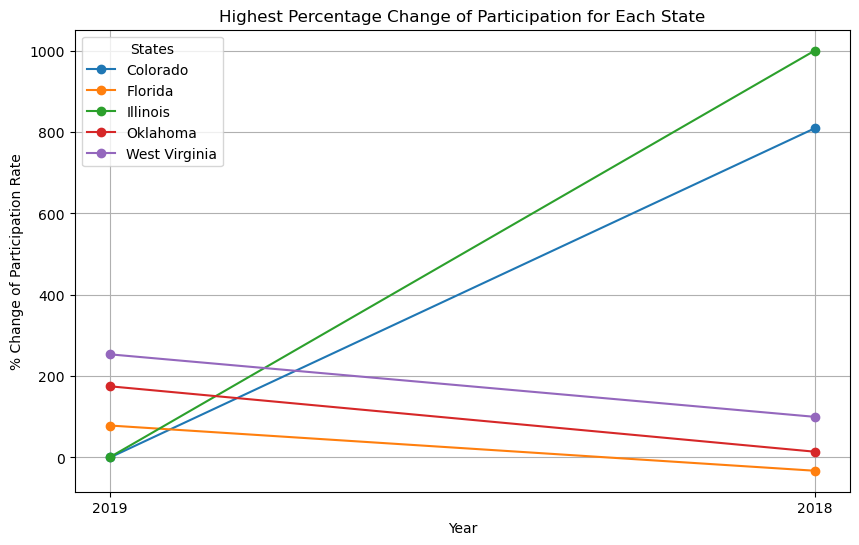

In [711]:
#df = pd.read_csv("sats_pct_change.csv")
df['change'] = (df['2019'] - df['2018']).abs()
df_select = df[df['change']>50]
df_select.count()

plt.figure(figsize=(10, 6))

for index, row in df_select.iterrows():
    plt.plot(['2019', '2018'], [row['2019'], row['2018']], marker='o', label=row['state'])

plt.title('Highest Percentage Change of Participation for Each State')
plt.xlabel('Year')
plt.ylabel('% Change of Participation Rate')
plt.legend(title='States')
plt.grid(True)
plt.show()

In [667]:
sats[sats["year"] == 2018]["state"]

51                  Alabama
52                   Alaska
53                  Arizona
54                 Arkansas
55               California
56                 Colorado
57              Connecticut
58                 Delaware
59     District of Columbia
60                  Florida
61                  Georgia
62                   Hawaii
63                    Idaho
64                 Illinois
65                  Indiana
66                     Iowa
67                   Kansas
68                 Kentucky
69                Louisiana
70                    Maine
71                 Maryland
72            Massachusetts
73                 Michigan
74                Minnesota
75              Mississippi
76                 Missouri
77                  Montana
78                 Nebraska
79                   Nevada
80            New Hampshire
81               New Jersey
82               New Mexico
83                 New York
84           North Carolina
85             North Dakota
86                 O

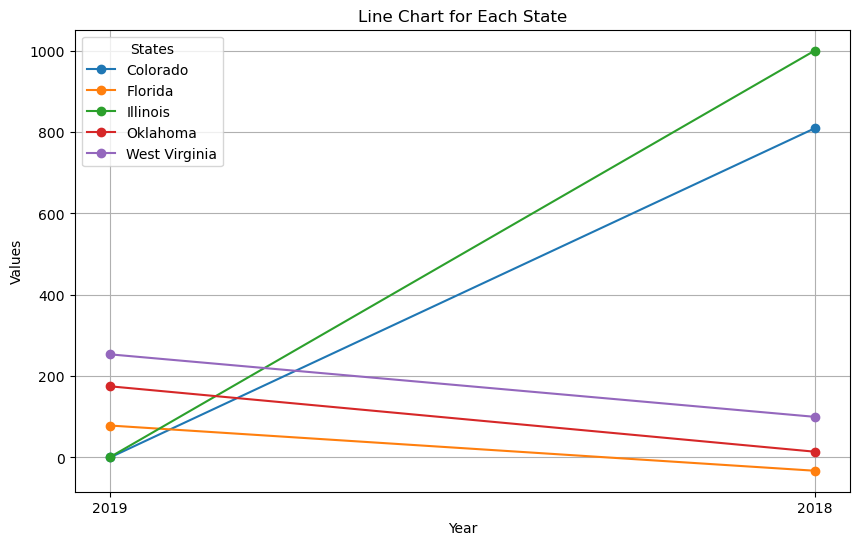

In [685]:
sats[sats['state']=='Illinois']

,state,participation,ebrw,math,total,year
13,Illinois,0.09,559,556,1115,2017
64,Illinois,0.99,513,506,1019,2018
115,Illinois,1.00,509,504,1013,2019


In [709]:
sats[sats['state']=='Colorado']

,state,participation,ebrw,math,total,year
5,Colorado,0.11,606,595,1201,2017
56,Colorado,1.00,519,506,1025,2018
107,Colorado,1.00,518,506,1024,2019


In [695]:
#sats_pct_change[2019].sort_values(ascending=False)
sats_pct_change.sort_values(2019, ascending=False).head(10).round(2)

year,state,2017,2018,2019
48,West Virginia,NaN,100.00,253.57
36,Oklahoma,NaN,14.29,175.00
9,Florida,NaN,-32.53,78.57
18,Louisiana,NaN,0.00,25.00
40,South Carolina,NaN,10.00,23.64
3,Arkansas,NaN,66.67,20.00
0,Alabama,NaN,20.00,16.67
42,Tennessee,NaN,20.00,16.67
31,New Mexico,NaN,45.45,12.50
20,Maryland,NaN,10.14,7.89


## Conclusions and Recommendations

Based on the exploration of the data, the key takeaway is to keep the test centers with consistently high total scores and participation for the Northeastern states. States with a steep positive increase in participation percentage growth are potential state areas for new test centers, such as x, y, z. However, more data is needed before allocating precious resources to building new examination locations.